In [15]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [16]:
# My libraries
import sim_ann as sa
import model

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [18]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  1.0
Lower!
Lower!
Lower!
{'arousal': [0.9050535306944474, 1.474431975417584],
 'attention_1': [3.0330813286082576, 1.2017918372711525],
 'attention_2': [0.5580049419725788, 5.614390972632896],
 'ff_ent': [1.4190315403476865, 1.724980156692498],
 'ff_is': [1.9826093958616213, 3.5399288885549782],
 'ff_ko': [1.3144373175152866, 1.2991448296801111],
 'ff_se': [2.9144460797962473, 2.2532519205336525],
 'ff_si': [1.342652786056937, 3.445530312582784],
 'mood': [1.3735315478902013, 1.505309883207254],
 'mood_speed': 0.0001,
 'prep_comm': [3.6709619566993714, 2.276546892200332],
 'prep_like': [2.6663349569216988, 1.8772465500274702],
 'prep_share': [2.1183904099742357, 2.7705120342081004],
 'satisfaction': [0.9638915719605021, 4.499357647467846],
 'srs_sal': [0.7410951082671667, 1.736422055991361]}
66.8635019004737
Temp:  0.5
Lower!
Lower!
Lower!
Lower!
{'arousal': [0.9441806863211509, 1.5479329610808892],
 'attention_1': [3.1204641611903376, 1.0989332841114685],
 'attention_2': [0.574

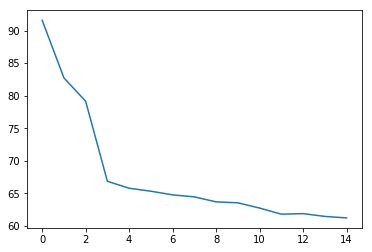

In [19]:
plt.plot(cost_hist)

## Dumping the simulated annealing results

In [20]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [21]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [22]:
a

{'arousal': [0.809001689614541, 1.6380862985630442],
 'attention_1': [3.273713833671667, 2.1353473416212485],
 'attention_2': [0.5732642917025187, 5.212558784844977],
 'ff_ent': [1.2197551209704196, 0.5157637889446673],
 'ff_is': [1.9813737778083924, 2.1946786962269016],
 'ff_ko': [1.0882010843335463, 1.3149843731821222],
 'ff_se': [2.798348806414127, 4.026797502533059],
 'ff_si': [1.4082360930930902, 2.2290540571579953],
 'mood': [1.3300634940111171, 2.6746060716395417],
 'mood_speed': 0.005062529209730919,
 'prep_comm': [3.5688856182083417, 3.7270693449643915],
 'prep_like': [2.6601979317454147, 0.4648277607013199],
 'prep_share': [2.5599460662953657, 2.6476589966738198],
 'satisfaction': [0.8547053647309821, 3.5755829234672514],
 'srs_sal': [0.7710004818706907, 2.0547674176739212]}

In [23]:
new_cost = sa.get_error(a)

In [24]:
new_cost

(61.24541654747185,
 {'arousal': [0.809001689614541, 1.6380862985630442],
  'attention_1': [3.273713833671667, 2.1353473416212485],
  'attention_2': [0.5732642917025187, 5.212558784844977],
  'ff_ent': [1.2197551209704196, 0.5157637889446673],
  'ff_is': [1.9813737778083924, 2.1946786962269016],
  'ff_ko': [1.0882010843335463, 1.3149843731821222],
  'ff_se': [2.798348806414127, 4.026797502533059],
  'ff_si': [1.4082360930930902, 2.2290540571579953],
  'mood': [1.3300634940111171, 2.6746060716395417],
  'mood_speed': 0.005062529209730919,
  'prep_comm': [3.5688856182083417, 3.7270693449643915],
  'prep_like': [2.6601979317454147, 0.4648277607013199],
  'prep_share': [2.5599460662953657, 2.6476589966738198],
  'satisfaction': [0.8547053647309821, 3.5755829234672514],
  'srs_sal': [0.7710004818706907, 2.0547674176739212]},
           mood      like     share   comment
 19    0.490828  0.177608  0.048858  0.000225
 39    0.509012  0.305238  0.350982  0.003252
 59    0.532814  0.260246  0.1

In [25]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [26]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

## Inputs

### Message Categories

Text(0.5,0,'Time step')

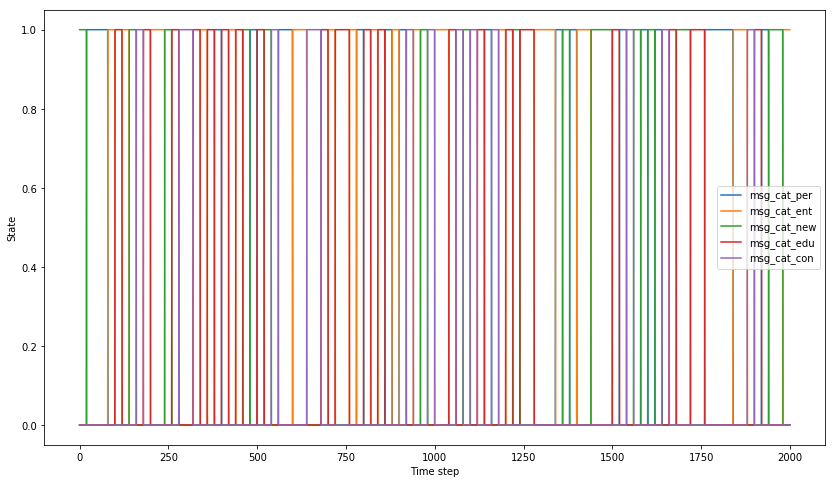

In [27]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

Text(0.5,0,'Time step')

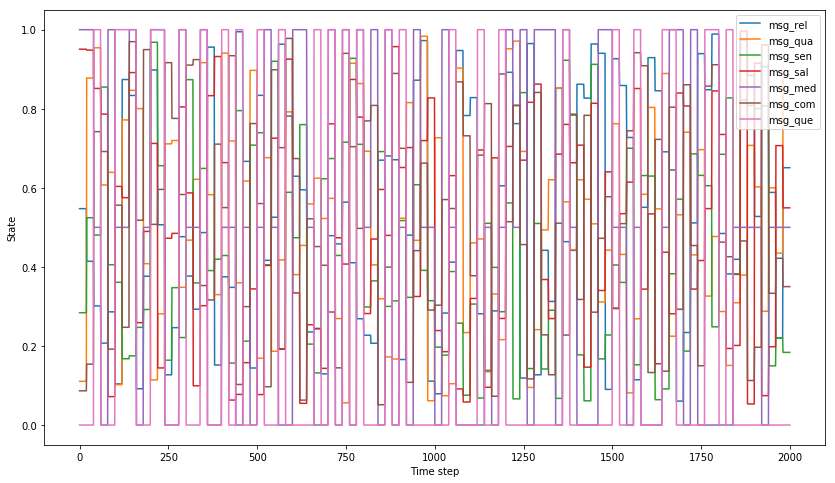

In [28]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

Text(0.5,0,'Time step')

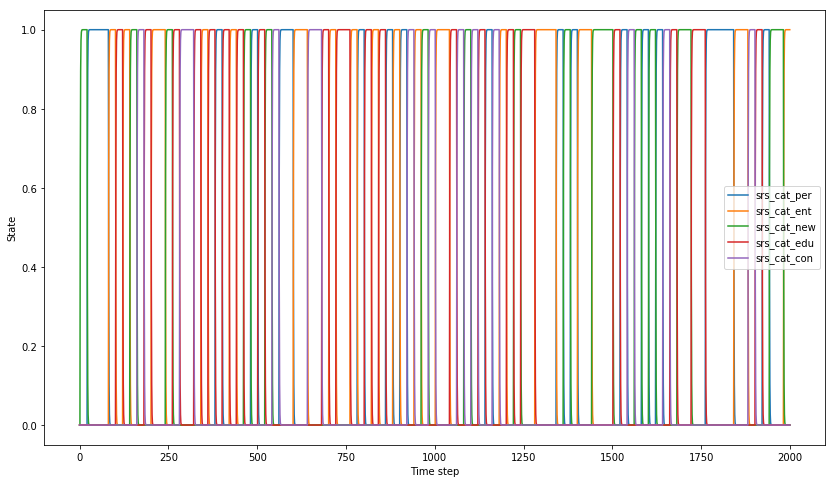

In [29]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

Text(0.5,0,'Time step')

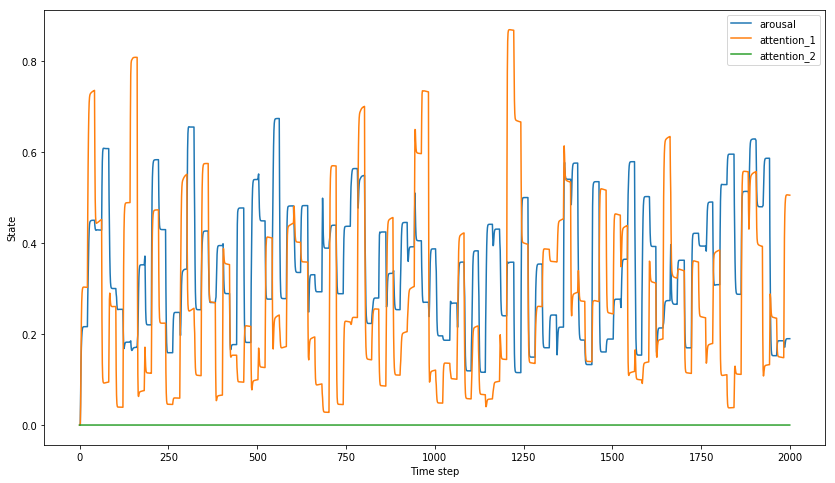

In [30]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### FFs

Text(0.5,0,'Time step')

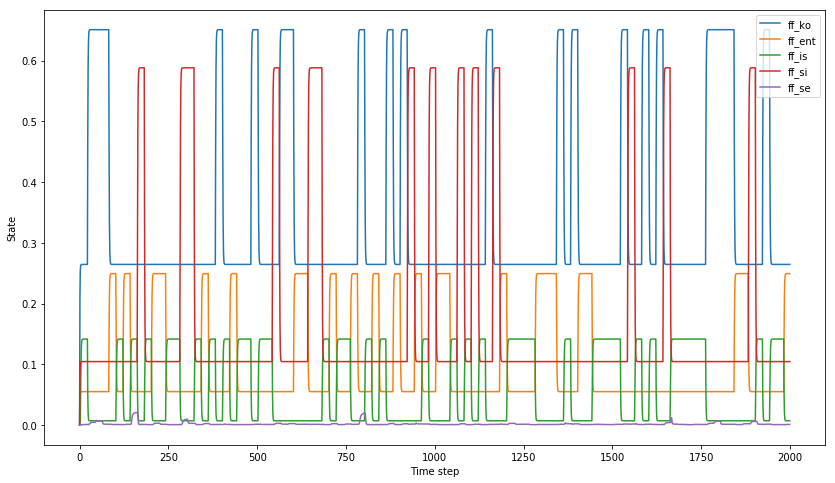

In [31]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction

Text(0.5,0,'Time step')

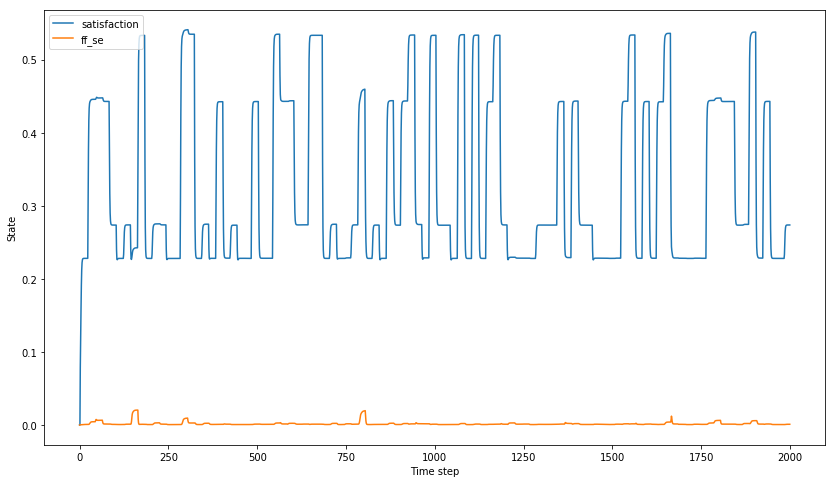

In [32]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

Text(0.5,0,'Time step')

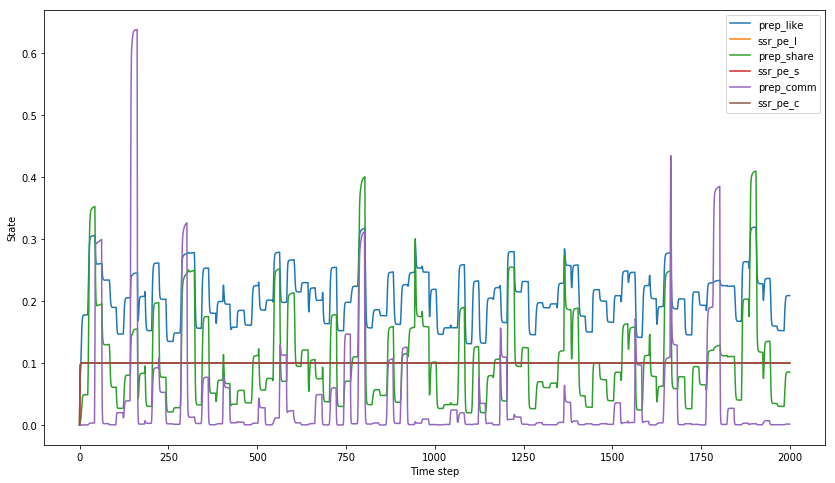

In [33]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5,0,'Time step')

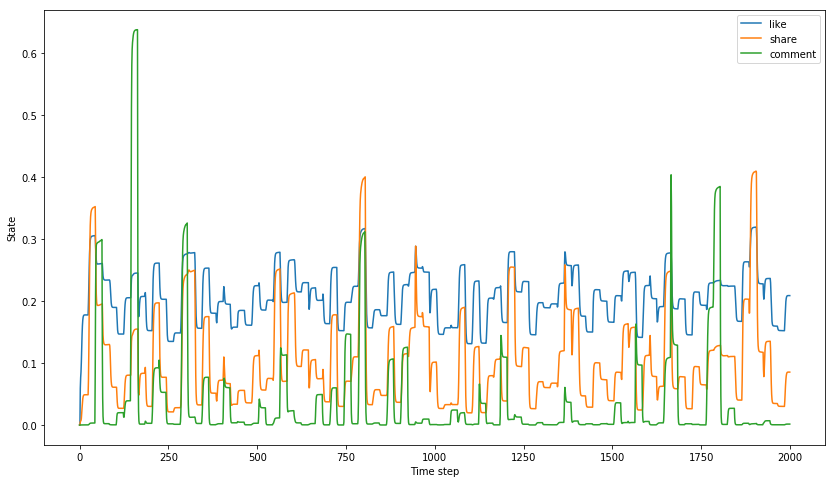

In [34]:
inputsDF[['like', 'share', 'comment']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

Text(0.5,0,'Time step')

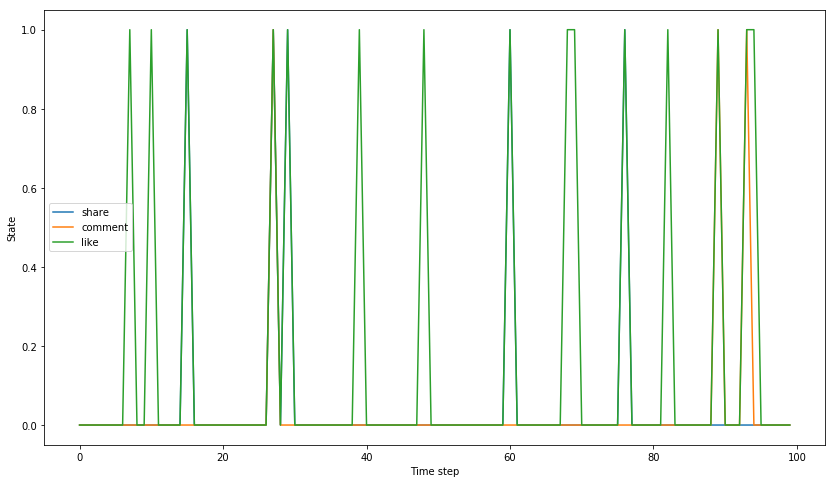

In [35]:
reactions1[['share', 'comment', 'like']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 2

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 3

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns